In [277]:
import pandas as pd
import numpy as np

In [278]:
marketingdata=pd.read_csv("/Users/devirughani/Desktop/IronHack/Week_1/Day_2/Labs/lab-customer-analysis-round-2/files_for_lab/csv_files/marketing_customer_analysis.csv")


In [279]:
marketingdata.shape

(10910, 26)

In [280]:
marketingdata.head()

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


In [281]:
list(marketingdata.columns)

['Unnamed: 0',
 'Customer',
 'State',
 'Customer Lifetime Value',
 'Response',
 'Coverage',
 'Education',
 'Effective To Date',
 'EmploymentStatus',
 'Gender',
 'Income',
 'Location Code',
 'Marital Status',
 'Monthly Premium Auto',
 'Months Since Last Claim',
 'Months Since Policy Inception',
 'Number of Open Complaints',
 'Number of Policies',
 'Policy Type',
 'Policy',
 'Renew Offer Type',
 'Sales Channel',
 'Total Claim Amount',
 'Vehicle Class',
 'Vehicle Size',
 'Vehicle Type']

In [282]:
marketingdata.drop(marketingdata.columns[marketingdata.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

In [283]:
list(marketingdata.columns)
display(marketingdata.head())

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


In [284]:
marketingdata.dtypes

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim          float64
Months Since Policy Inception      int64
Number of Open Complaints        float64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
Vehicle Type    

#Numerical: Total Claim Amount,Customer Lifetime Value,Months Since Last Claim,Number of Open Complaints,Total Claim Amount  

Categorical: State, Response, Coverage,Education,Employment Status,Gender, Monthly premium Auto, Policy Type, Policy, Sales Channel, Vehical Class, Vehicle Class, Vehicle Type

In [285]:
marketingdata.isna().sum()
round(marketingdata.isna().sum()/marketingdata.shape[0],4)*100

Customer                          0.00
State                             5.78
Customer Lifetime Value           0.00
Response                          5.78
Coverage                          0.00
Education                         0.00
Effective To Date                 0.00
EmploymentStatus                  0.00
Gender                            0.00
Income                            0.00
Location Code                     0.00
Marital Status                    0.00
Monthly Premium Auto              0.00
Months Since Last Claim           5.80
Months Since Policy Inception     0.00
Number of Open Complaints         5.80
Number of Policies                0.00
Policy Type                       0.00
Policy                            0.00
Renew Offer Type                  0.00
Sales Channel                     0.00
Total Claim Amount                0.00
Vehicle Class                     5.70
Vehicle Size                      5.70
Vehicle Type                     50.25
dtype: float64

In [286]:
marketingdata2=marketingdata.copy()

In [287]:
marketingdata2['State']=marketingdata['State'].fillna("Unknown")
marketingdata2['Response']=marketingdata['Response'].fillna("Unknown")
marketingdata2['Vehicle Class']=marketingdata['Vehicle Class'].fillna("Unknown")
marketingdata2['Vehicle Size']=marketingdata['Vehicle Size'].fillna("Unknown")

#Make these unknown as other information is valuable. 

marketingdata2.isna().sum()
round(marketingdata2.isna().sum()/marketingdata2.shape[0],4)*100
print(marketingdata2.shape)

(10910, 25)


#Months Since Last Claim, Number of open complains (remove those rows) because will cause complications in operations
at a later date.

In [288]:
marketingdata3=marketingdata2.drop(['Vehicle Type'], axis=1)

In [289]:
marketingdata3.dropna(subset = ["Months Since Last Claim"], inplace=True)
marketingdata3.dropna(subset = ["Number of Open Complaints"], inplace=True)
marketingdata3.isna().sum()

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [290]:
marketingdata3.shape

(10277, 24)

#6 Datetime format - Extract the months from the dataset and store in a separate column. Then filter the data to show only the information for the first quarter , ie. January, February and March. Hint: If data from March does not exist, consider only January and February.

In [291]:
marketingdata3['Effective To Date']=pd.to_datetime(marketingdata3['Effective To Date'])
marketingdata3['Effective To Date']

0       2011-02-18
1       2011-01-18
2       2011-02-10
3       2011-01-11
5       2011-02-14
           ...    
10904   2011-02-24
10906   2011-01-06
10907   2011-02-06
10908   2011-02-13
10909   2011-01-08
Name: Effective To Date, Length: 10277, dtype: datetime64[ns]

In [292]:
marketingdata3['Month']=marketingdata3['Effective To Date'].dt.month
marketingdata3.columns
marketingdata3.head(200)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Month
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,2
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,1
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,2
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,1
5,HO81102,Unknown,4745.181764,Unknown,Basic,High School or Below,2011-02-14,Employed,M,50549,...,0.0,7,Personal Auto,Personal L3,Offer1,Agent,292.800000,Four-Door Car,Medsize,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,YB42706,Nevada,8107.265330,No,Extended,College,2011-01-23,Unemployed,M,0,...,0.0,2,Corporate Auto,Corporate L1,Offer3,Branch,364.800000,Two-Door Car,Small,1
212,UX91266,California,3484.141641,No,Extended,Bachelor,2011-01-10,Employed,M,34307,...,2.0,1,Personal Auto,Personal L3,Offer1,Call Center,186.025014,Four-Door Car,Medsize,1
213,WO53546,Oregon,34039.056130,No,Basic,College,2011-01-28,Unemployed,M,0,...,0.0,2,Personal Auto,Personal L3,Offer2,Agent,499.200000,Sports Car,Medsize,1
214,ZX85480,Washington,7995.441263,No,Basic,High School or Below,2011-01-02,Employed,F,66685,...,2.0,2,Personal Auto,Personal L2,Offer2,Call Center,38.763897,Two-Door Car,Large,1


In [293]:
marketingdata3['Month'].unique()

array([2, 1])

In [294]:
first_quarter=marketingdata3.copy()

In [295]:
first_quarter=first_quarter[(first_quarter['Month']<=3)]
first_quarter.shape

(10277, 25)

In [296]:
#Bonus Question
df = marketingdata.copy()

def bonus(df):
    #1. show dataframe shape
    print(df.shape)
    
    
    #2. Standardise list comprehension
    #df.columns= [col.lower() for col in column] 
    
    cols = []
    for col in df.columns:
        cols.append(col.lower())
        
    df.columns=cols
    print(df.columns)
    
    
    #3. Which columns are numerical?
    
    print("The numerical columns are:" )
    display(df.select_dtypes(np.number))
    
    
    #4. Which columns are categorical?
    
    print("The categorical columns are:" )
    display(df.select_dtypes(np.object))
    
    #Check and deal with 'NaN' values
    
    print("The dataframe contains these missing values:", df.isna().sum())
    
    #Dattime format - extract months from the dataset and store in a separate column
    
    df['effective to date'] = pd.to_datetime(df['effective to date'], errors = 'coerce')
    df['month'] = df['effective to date'].dt.month
    
    display(df[['month']])
    
    return df

In [297]:
bonus(df)

(10910, 25)
Index(['customer', 'state', 'customer lifetime value', 'response', 'coverage',
       'education', 'effective to date', 'employmentstatus', 'gender',
       'income', 'location code', 'marital status', 'monthly premium auto',
       'months since last claim', 'months since policy inception',
       'number of open complaints', 'number of policies', 'policy type',
       'policy', 'renew offer type', 'sales channel', 'total claim amount',
       'vehicle class', 'vehicle size', 'vehicle type'],
      dtype='object')
The numerical columns are:


,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount
0,4809.216960,48029,61,7.0,52,0.0,9,292.800000
1,2228.525238,0,64,3.0,26,0.0,1,744.924331
2,14947.917300,22139,100,34.0,31,0.0,2,480.000000
3,22332.439460,49078,97,10.0,3,0.0,2,484.013411
4,9025.067525,23675,117,NaN,31,NaN,7,707.925645
...,...,...,...,...,...,...,...,...
10905,15563.369440,0,253,NaN,40,NaN,7,1214.400000
10906,5259.444853,61146,65,7.0,68,0.0,6,273.018929
10907,23893.304100,39837,201,11.0,63,0.0,2,381.306996
10908,11971.977650,64195,158,0.0,27,4.0,6,618.288849


The categorical columns are:


/var/folders/mw/6447zlmn5h9_r3fs75_lzjgm0000gn/T/ipykernel_15560/2310715975.py:29: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  display(df.select_dtypes(np.object))


,customer,state,response,coverage,education,effective to date,employmentstatus,gender,location code,marital status,policy type,policy,renew offer type,sales channel,vehicle class,vehicle size,vehicle type
0,DK49336,Arizona,No,Basic,College,2/18/11,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,NaN
1,KX64629,California,No,Basic,College,1/18/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,No,Basic,Bachelor,2/10/11,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A
3,XL78013,Oregon,Yes,Extended,College,1/11/11,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A
4,QA50777,Oregon,No,Premium,Bachelor,1/17/11,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,No,Premium,Bachelor,1/19/11,Unemployed,F,Suburban,Married,Personal Auto,Personal L1,Offer3,Web,Luxury Car,Medsize,A
10906,KX53892,Oregon,No,Basic,College,1/6/11,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize,A
10907,TL39050,Arizona,No,Extended,Bachelor,2/6/11,Employed,F,Rural,Married,Corporate Auto,Corporate L3,Offer1,Web,Luxury SUV,Medsize,NaN
10908,WA60547,California,No,Premium,College,2/13/11,Employed,F,Urban,Divorced,Personal Auto,Personal L1,Offer1,Branch,SUV,Medsize,A


The dataframe contains these missing values: customer                            0
state                             631
customer lifetime value             0
response                          631
coverage                            0
education                           0
effective to date                   0
employmentstatus                    0
gender                              0
income                              0
location code                       0
marital status                      0
monthly premium auto                0
months since last claim           633
months since policy inception       0
number of open complaints         633
number of policies                  0
policy type                         0
policy                              0
renew offer type                    0
sales channel                       0
total claim amount                  0
vehicle class                     622
vehicle size                      622
vehicle type                     5482
dtype

,month
0,2
1,1
2,2
3,1
4,1
...,...
10905,1
10906,1
10907,2
10908,2


,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,...,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type,month
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN,2
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN,1
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,23675,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,2011-01-19,Unemployed,F,0,...,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A,1
10906,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,61146,...,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,1
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,39837,...,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN,2
10908,WA60547,California,11971.977650,No,Premium,College,2011-02-13,Employed,F,64195,...,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A,2


#**Lab 3 answers to follow**

In [298]:
marketing_data_clean=pd.read_csv("/Users/devirughani/Desktop/IronHack/Week_1/Day_3/Labs/lab-customer-analysis-round-3/files_for_lab/csv_files/marketing_customer_analysis.csv")

In [299]:
marketing_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [300]:
marketing_description=marketing_data_clean.describe().T
display(marketing_description)

#.T switches the rows to columns and columns to rows

,count,mean,std,min,25%,50%,75%,max
Customer Lifetime Value,9134.0,8004.940475,6870.967608,1898.007675,3994.251794,5780.182197,8962.167041,83325.381190
Income,9134.0,37657.380009,30379.904734,0.000000,0.000000,33889.500000,62320.000000,99981.000000
Monthly Premium Auto,9134.0,93.219291,34.407967,61.000000,68.000000,83.000000,109.000000,298.000000
Months Since Last Claim,9134.0,15.097000,10.073257,0.000000,6.000000,14.000000,23.000000,35.000000
Months Since Policy Inception,9134.0,48.064594,27.905991,0.000000,24.000000,48.000000,71.000000,99.000000
Number of Open Complaints,9134.0,0.384388,0.910384,0.000000,0.000000,0.000000,0.000000,5.000000
Number of Policies,9134.0,2.966170,2.390182,1.000000,1.000000,2.000000,4.000000,9.000000
Total Claim Amount,9134.0,434.088794,290.500092,0.099007,272.258244,383.945434,547.514839,2893.239678


<AxesSubplot:>

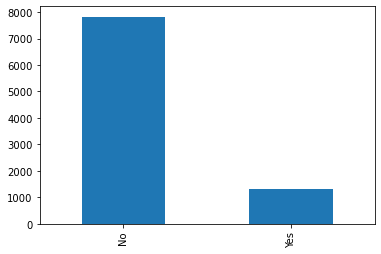

In [301]:
#Show a plot of the total number of responses.

import matplotlib.pyplot as plt

responses=marketing_data_clean['Response'].value_counts().plot(kind='bar')
display(responses)

,Response,Sales Channel
0,No,Agent
1,No,Agent
2,No,Agent
3,No,Call Center
4,No,Agent
...,...,...
9129,No,Web
9130,Yes,Branch
9131,No,Branch
9132,No,Branch


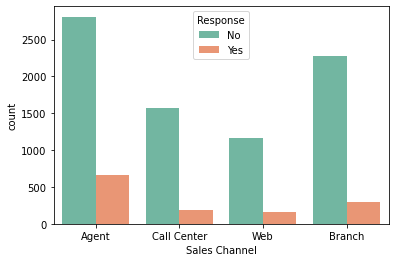

In [302]:
#Show a plot of the response rate by the sales channel.

responsebychannel=marketing_data_clean.loc[:,['Response','Sales Channel']]
display(responsebychannel)

import seaborn as sns

#sns.countplot(x='Sales Channel',hue='Response', data=marketing_data_cleanl, palette="Set2")
responsebychannelplot=sns.countplot(x='Sales Channel',hue='Response', data=responsebychannel, palette="Set2")

In [303]:
pd.crosstab(responsebychannel['Sales Channel'],responsebychannel['Response'])

Response,No,Yes
Sales Channel,,
Agent,2811,666
Branch,2273,294
Call Center,1573,192
Web,1169,156


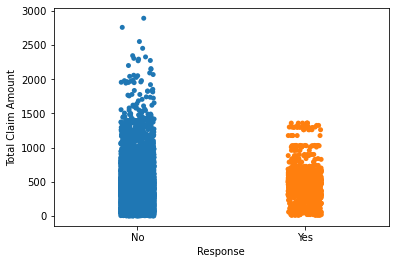

In [304]:
#Show a plot of the response rate by the total claim amount.

responsebytotalclaim=marketing_data_clean.loc[:,['Response','Total Claim Amount']]
responsebytotalclaim=sns.stripplot(x='Response', y='Total Claim Amount',data=responsebytotalclaim)

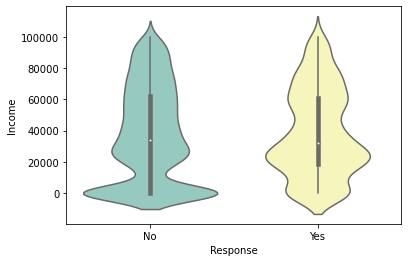

In [305]:
#Show a plot of the response rate by income.
responsebyincome=marketing_data_clean.loc[:,['Response','Income']]
responsebytotalclaim=sns.violinplot(x='Response', y='Income',data=responsebyincome, palette="Set3")

**Lab 4 Answers**

Check the data types of the columns. Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals. (You can use np.number and np.object to select the numerical data types and categorical data types respectively)

In [306]:
marketing_data_clean.dtypes

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

In [307]:
numerical=marketing_data_clean.select_dtypes(np.number)
numerical

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [308]:
categorical=marketing_data_clean.select_dtypes(np.object)
categorical

/var/folders/mw/6447zlmn5h9_r3fs75_lzjgm0000gn/T/ipykernel_15560/2042963715.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical=marketing_data_clean.select_dtypes(np.object)


,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,2/10/11,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,2/12/11,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,2/6/11,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,2/3/11,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


Now we will try to check the normality of the numerical variables visually.
#Use seaborn library to construct distribution plots for the numerical variables

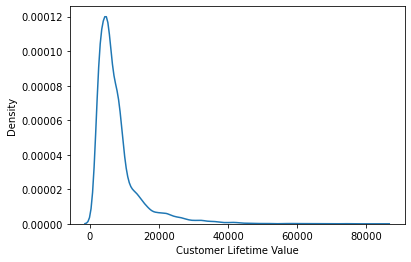

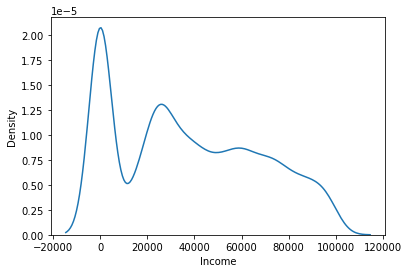

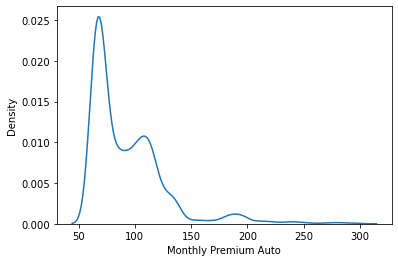

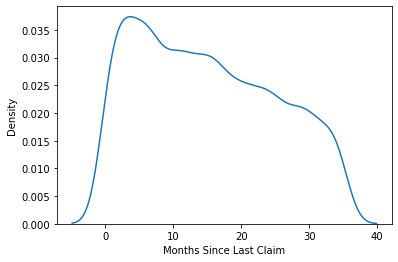

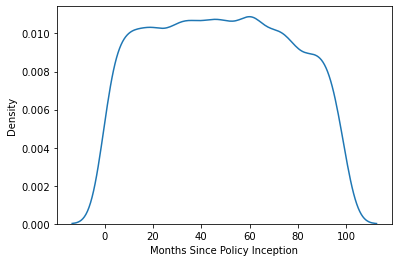

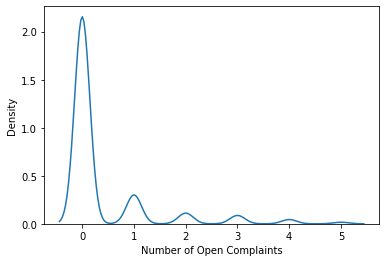

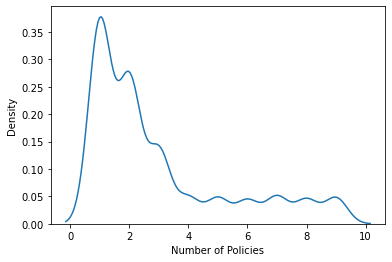

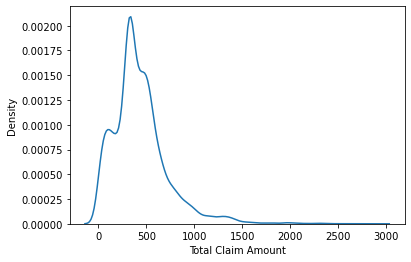

In [309]:
for column in numerical.columns:
    sns.kdeplot(data= numerical, x=column)
    plt.show()

In [310]:
#Use Matplotlib to construct histograms

In [311]:
#for boxplot and histogram comparison:
fig, axis = plt.subplots(2,1,sharex=True, figsize=(15,10)) #to share the same X axis so the boxplot and the plot below
#match
sns.boxplot(numerical["Customer Lifetime Value"],ax = axis[0]);
sns.histplot(numerical["Customer Lifetime Value"],ax = axis[1], kde=True, stat="percent”)
plt.show()

SyntaxError: EOL while scanning string literal (4213655426.py, line 5)

In [312]:
#Comparison between percent argument in height of bars on plots
fig, axis = plt.subplots (2,3, figsize=(15,10))
sns.histplot(numerical[‘Customer Lifetime Value’],ax = axis[0,0], kde=True);
sns.histplot(numerical[‘Customer Lifetime Value’],ax = axis[0,1], kde=True, stat=“percent”);
sns.boxplot(numerical[‘Customer Lifetime Value’],ax = axis[0,2]);
sns.histplot(numerical[‘Income’],ax= axis[1,0], kde=True, bins=30);
sns.histplot(numerical[‘Income’],ax= axis[1,1], kde=True, stat = “percent”, bins= 30); #the height of the bar is
#the division of this one by the total sum of height of all bars, even if they are not visible in the plot.
sns.boxplot(numerical[‘Income’],ax = axis[1,2]);

SyntaxError: invalid character '‘' (U+2018) (3506993527.py, line 3)

In [313]:
fig, axis = plt.subplots(numerical.shape, figsize=(15, 10)

for column in enumerate(numerical.columns) :
    sns.histplot(x=column, data = numerical, bins = 20, kde=True, ax=ax[column])
plt.show()

SyntaxError: invalid syntax (3822677998.py, line 3)

In [314]:
#Do the distributions for different numerical variables look like a normal distribution? 
#Customer lifetime value, Total claim amount and 
#Income looks qutie uniform

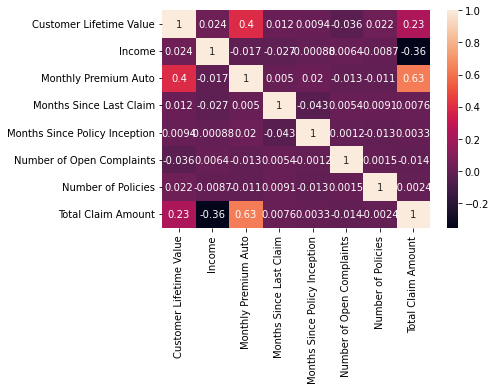

In [315]:
correlations_matrix = numerical.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

In [ ]:
#Correlations are weak. Some multicolinnearity between MPA, CLV and Total Claim amount. 
#But not high enough so will no drop.

**Lab 5**: Processing Data

In [ ]:
#X-y split.
#Normalize (numerical).

In [ ]:
numerical.columns

In [346]:
np.isinf(numerical['Total Claim Amount']).value_counts()

False    9134
Name: Total Claim Amount, dtype: int64

In [ ]:
y = numerical['Total Claim Amount']
X_num = numerical.drop(['Total Claim Amount'], axis=1)

In [ ]:
display(numerical.head(50))
numerical.shape

In [273]:
#Using MinMax Scaler- normalizing by making data range from 0 - 1, instead of from min to max

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

transformer = MinMaxScaler().fit(X_num)
X_normalized = transformer.transform(X_num)
print(X_normalized.shape)
X_normalized
pd.DataFrame(X_normalized, columns=X_num.columns)
X_normalized=pd.DataFrame(X_normalized, columns=X_num.columns)

(9134, 7)


/Users/devirughani/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Total Claim Amount', ylabel='Density'>

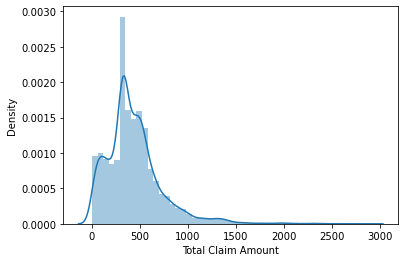

In [355]:
sns.distplot(y)

In [380]:
y.columns

Index(['Total Claim Amount'], dtype='object')

/Users/devirughani/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,Total Claim Amount
0,5.952753
1,7.031268
2,6.339428
3,6.272653
4,4.928202
...,...
9129,5.289452
9130,5.938064
9131,6.673026
9132,6.538429


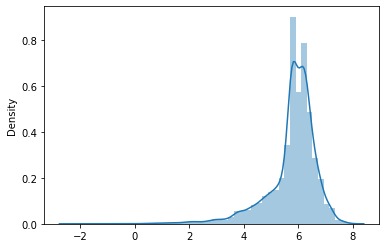

In [381]:
#Log transformation for y
y = numerical['Total Claim Amount']
y=pd.DataFrame(y, columns=['Total Claim Amount'])

y_log=list(map(np.log,y['Total Claim Amount']))


sns.distplot(y_log)


y_log=pd.DataFrame(y_log, columns=y.columns)
display(y_log)

In [ ]:
#print(y_log)
#sns.distplot(y_log)
#plt.show()

**Lab 6: Data Processing Continued**

In [ ]:
for x in categorical.columns:
    #prinfting unique values
    print(x ,':', len(categorical[x].unique()), "labels")

In [ ]:
categorical_for_model=categorical.drop(columns =['Customer', 'Effective To Date'])
print(categorical_for_model.columns)

In [ ]:
#Coverage, Education and Response can be ranked, thus ordinal. So replace the values. 
categorical_ordinal_values = categorical_for_model.copy()
categorical_ordinal_values = categorical_ordinal_values[['Education','Coverage','Response']]


#1. Response
mapping = {'No':0,'Yes':1}
categorical_ordinal_values = categorical_ordinal_values.replace({'Response': mapping})

#Coverage
mapping2 = {'Basic':0,'Extended':1,'Premium':2}
categorical_ordinal_values = categorical_ordinal_values.replace({'Coverage': mapping2})


#Education
mapping3 = {'High School or Below':0,'College':1,'Bachelor':2,'Master':3,'Doctor':4}
categorical_ordinal_values = categorical_ordinal_values.replace({'Education': mapping3})

#Vehicle Size
mapping4 = {'High School or Below':0,'College':1,'Bachelor':2,'Master':3,'Doctor':4}
categorical_ordinal_values = categorical_ordinal_values.replace({'Education': mapping3})

display(categorical_ordinal_values) #This remains Dataframe

#Effective to Date- change to datetime

In [254]:
categorical_for_ohe=categorical_for_model.drop(columns =['Education', 'Coverage','Response'])
print(categorical_for_ohe.columns)
display(categorical_for_ohe)

Index(['State', 'EmploymentStatus', 'Gender', 'Location Code',
       'Marital Status', 'Policy Type', 'Policy', 'Renew Offer Type',
       'Sales Channel', 'Vehicle Class', 'Vehicle Size'],
      dtype='object')


,State,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,Washington,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...
9129,California,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,California,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,California,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,California,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [205]:
from sklearn.preprocessing import OneHotEncoder
#One Hot - State, Response, Effective to Date, Employment Status, Gender, Location Code, Marital Status, Policy Type, Sale
#Label - Response, Coverage, Education.
http://localhost:8888/notebooks/Desktop/IronHack/Week_1/Day_5/Labs/lab-customer-analysis-round-6/Day5_Lab6_Answers.ipynb#
#encoder = OneHotEncoder()
#encoder.fit(categorical_for_ohe.columns) #This determines how many unique values has each categorical column
#print(encoder.categories_)
#categorical_encoded=encoder.transform(categorical_for_ohe).toarray()
#print(categorical_encoded)
#categorical_onehot_encoded=pd.DataFrame(categorical_encoded, columns=encoder.categories_)
#categorical_onehot_encoded.head(20)


In [266]:
#Define function for passing each column through the one hot encoder

def OneHotColumn(categorical_for_ohe_column):
    encoder = OneHotEncoder(handle_unknown='ignore')
    encoder = encoder.fit(categorical_for_ohe_column)
    onehot_encoded = encoder.transform(categorical_for_ohe_column).toarray()
    return pd.DataFrame(onehot_encoded,columns = encoder.categories_)


categorical_concat_ohe = pd.DataFrame()

for col in categorical_for_ohe.columns:
    categorical_onehot_encoded = OneHotColumn(categorical_for_ohe[[col]])
    categorical_concat_ohe = pd.concat([categorical_concat_ohe,categorical_onehot_encoded], axis=1)

display(categorical_concat_ohe)

#Recap Lambda method

,Arizona,California,Nevada,Oregon,Washington,Disabled,Employed,Medical Leave,Retired,Unemployed,...,Web,Four-Door Car,Luxury Car,Luxury SUV,SUV,Sports Car,Two-Door Car,Large,Medsize,Small
0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9130,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9131,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9132,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [318]:
X=pd.concat([categorical_ordinal_values, categorical_concat_ohe,X_normalized], axis =1)
model_data.shape

(9134, 57)

In [383]:
y_log.head()

,Total Claim Amount
0,5.952753
1,7.031268
2,6.339428
3,6.272653
4,4.928202


In [385]:
#train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #Change to y-log in Lab7
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7307, 57)
(1827, 57)
(7307, 1)
(1827, 1)


In [322]:
#we train/fit our model. Description:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [323]:
#R2 train
from sklearn.metrics import r2_score
y_pred_train = lm.predict(X_train)
r2_score(y_train, y_pred_train)

0.7695399428031219

In [325]:
#R2 test - # But now we evaluate it in the TEST portion of the data, that we did not use for training.
# This way we know our model is genuinely guessing total claim, not just repeating the values it has seen in the training data

y_pred_test=lm.predict(X_test)
r2_score(y_test, y_pred_test)

#The similar R2 suggests the model is so far good at predicting total claim with new data.

0.7621851313658825

In [328]:
from sklearn.metrics import mean_squared_error
#MSE 
mse=(mean_squared_error(y_test,y_pred_test))
print(mse)


#and RMSE.

rmse=np.sqrt(mean_squared_error(y_test,y_pred_test))
print(rmse)

18908.90771533342
137.5096640797781


In [330]:
from sklearn.metrics import mean_absolute_error
#MAE - mean absolute error

mae = mean_absolute_error(y_test, y_pred_test)
mae

95.79850479200874

In [ ]:
#lab 7-Improvements: 

#Defining function 
#Add standard scaler below min max
#-Logging y
#-Label encoding (adding /removing ordinals)
#-Which X variables to discard (by comparing error metrics)

#Lab 8 - 
#Unlog
